In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_gameplay_data = pd.read_csv("Gameplay_Data.csv")
df_gameplay_data.head()

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players
0,90976392B3AA5DB94D134936B765879E,1607294430194,0.0,W,0.1,D,4
1,7457E894E1F7F1938E55802B964BDD27,1607286707669,10.0,W,17.0,A,2
2,52E43F75D7393581C4E2C5EDC7D24671,1607023262845,35.0,L,0.0,A,2
3,5736C06C66C6BC7036CCE9804F54A57C,1607778875873,10.0,W,32.0,B,4
4,5FE2DDA792CA72F731D818A5ECC5F1EB,1607778574193,25.0,W,42.0,A,2


In [278]:
# COnverting EventTime to DateTime
df_gameplay_data['Eventtime_timestamp'] = pd.to_datetime(df_gameplay_data['Eventtime'],unit='ms')
df_gameplay_data.head()

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,Eventtime_timestamp
0,90976392B3AA5DB94D134936B765879E,1607294430194,0.0,W,0.1,D,4,2020-12-06 22:40:30.194
1,7457E894E1F7F1938E55802B964BDD27,1607286707669,10.0,W,17.0,A,2,2020-12-06 20:31:47.669
2,52E43F75D7393581C4E2C5EDC7D24671,1607023262845,35.0,L,0.0,A,2,2020-12-03 19:21:02.845
3,5736C06C66C6BC7036CCE9804F54A57C,1607778875873,10.0,W,32.0,B,4,2020-12-12 13:14:35.873
4,5FE2DDA792CA72F731D818A5ECC5F1EB,1607778574193,25.0,W,42.0,A,2,2020-12-12 13:09:34.193


In [279]:
df_gameplay_data.drop_duplicates(inplace = True)
df_gameplay_data.describe()

,Eventtime,Entry_Fee,Winnings,Num_Players
count,2.992220e+05,299222.000000,299222.000000,299222.000000
mean,1.608411e+12,14.339604,11.398418,2.823021
std,7.038303e+08,71.833025,80.654191,0.984216
min,1.606783e+12,0.000000,0.000000,2.000000
25%,1.607881e+12,1.000000,0.000000,2.000000
50%,1.608481e+12,1.000000,0.200000,2.000000
75%,1.609018e+12,10.000000,2.000000,4.000000
max,1.609459e+12,10000.000000,9000.000000,4.000000


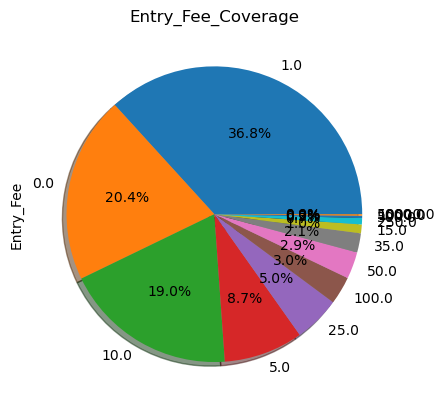

In [300]:
df = df_gameplay_data.Entry_Fee.value_counts()/df_gameplay_data.shape[0]
df.to_frame().plot.pie(y="Entry_Fee",title= "Entry_Fee_Coverage", legend=False, 
                   autopct='%1.1f%%',  
                   shadow=True, startangle=0)

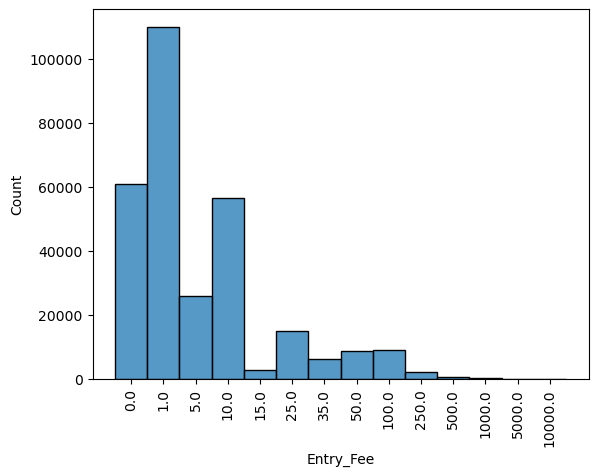

In [18]:
plt.xticks(rotation = 90)
sns.histplot(x = "Entry_Fee",data = df_gameplay_data[["Entry_Fee"]].sort_values(by='Entry_Fee').astype(str))

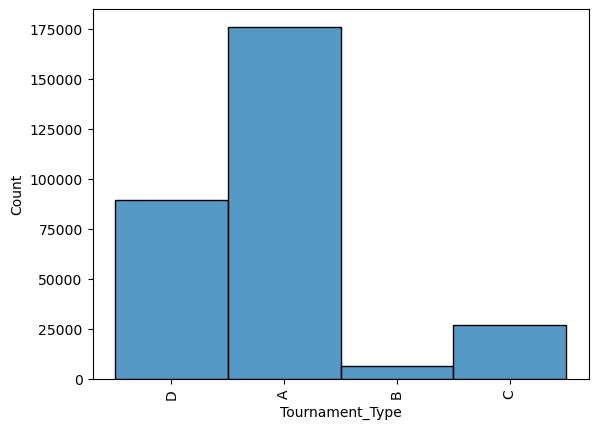

In [21]:
plt.xticks(rotation = 90)
sns.histplot(x = "Tournament_Type",data = df_gameplay_data.Tournament_Type.to_frame())

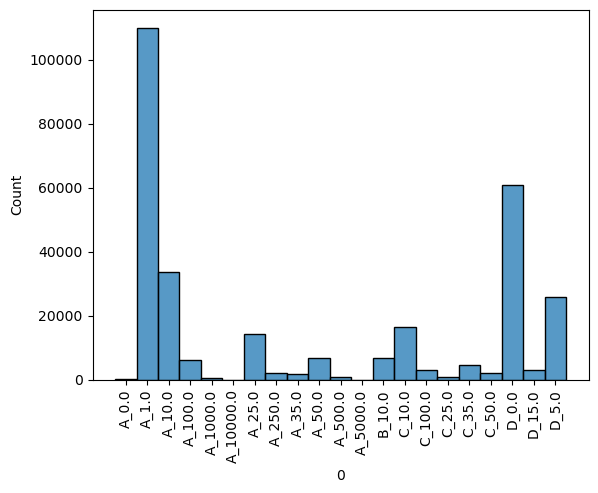

In [31]:
temp = df_gameplay_data["Tournament_Type"]+"_" + df_gameplay_data["Entry_Fee"].astype(str)
# print(temp.to_frame().value_counts()/temp.shape[0])
plt.xticks(rotation = 90)
sns.histplot(x = 0,data = temp.to_frame().sort_values(by = 0))

In [316]:
x = df_gameplay_data[["Num_Players","Tournament_Type"]].value_counts().to_frame()
x/x.sum()

0
Num_Players Tournament_Type          
2           A                0.588489
4           D                0.299614
            C                0.089522
            B                0.022375

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa16c4781c0>]],
      dtype=object)

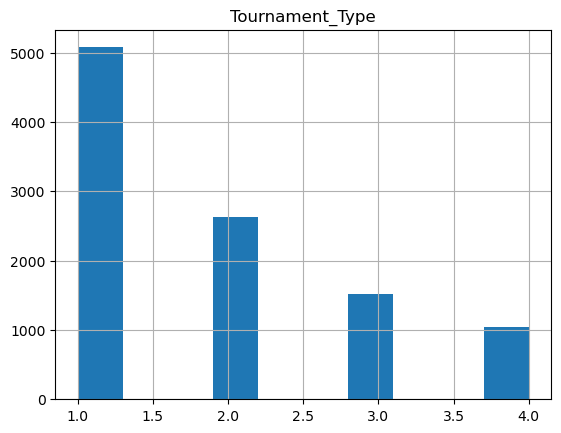

In [303]:
# Do users play different type of games or stick to same game type. 

df_gameplay_data[['Uid','Tournament_Type']].groupby(['Uid'])['Tournament_Type'].apply(lambda x: len(set(x))).to_frame().hist()

In [305]:
temp = df_gameplay_data[['Uid','Tournament_Type','Entry_Fee']]
temp["Different_game_types"] =  temp["Tournament_Type"]+"_" + temp["Entry_Fee"].astype(str)
temp.head()

,Uid,Tournament_Type,Entry_Fee,Different_game_types
0,90976392B3AA5DB94D134936B765879E,D,0.0,D_0.0
1,7457E894E1F7F1938E55802B964BDD27,A,10.0,A_10.0
2,52E43F75D7393581C4E2C5EDC7D24671,A,35.0,A_35.0
3,5736C06C66C6BC7036CCE9804F54A57C,B,10.0,B_10.0
4,5FE2DDA792CA72F731D818A5ECC5F1EB,A,25.0,A_25.0


<Figure size 1000x1000 with 0 Axes>

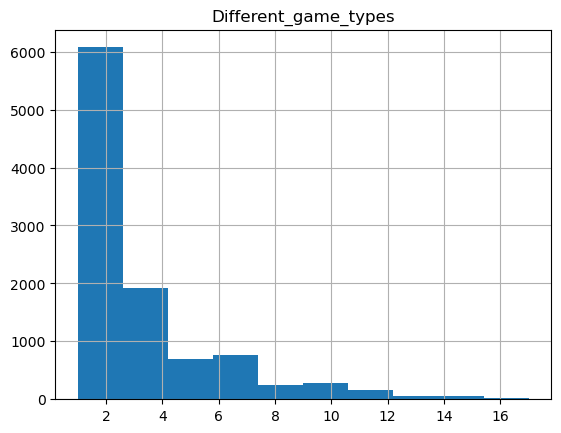

In [308]:
plt.figure(figsize = (10,10))
temp[['Uid','Different_game_types']].groupby(['Uid'])['Different_game_types'].apply(lambda x: len(set(x))).to_frame().hist()
plt.show()

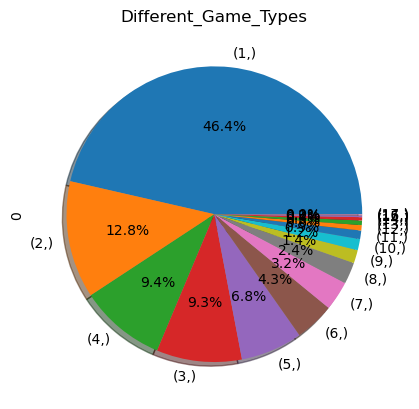

In [315]:
df = temp[['Uid','Different_game_types']].groupby(['Uid'])['Different_game_types'].apply(lambda x: len(set(x))).to_frame().value_counts().to_frame()
x = df/df.sum()
x.plot.pie(y=0,title= "Different_Game_Types", legend=False, 
                   autopct='%1.1f%%',  
                   shadow=True, startangle=0)

In [58]:
df_gameplay_data[df_gameplay_data.Tournament_Type == 'A']['Entry_Fee'].value_counts()

1.0        109995
10.0        33616
25.0        14253
50.0         6773
100.0        6096
250.0        2063
35.0         1792
500.0         749
1000.0        477
0.0           251
5000.0         23
10000.0         1
Name: Entry_Fee, dtype: int64

In [59]:
df_gameplay_data[df_gameplay_data.Tournament_Type == 'B']['Entry_Fee'].value_counts()

10.0    6695
Name: Entry_Fee, dtype: int64

In [60]:
df_gameplay_data[df_gameplay_data.Tournament_Type == 'C']['Entry_Fee'].value_counts()

10.0     16412
35.0      4492
100.0     3013
50.0      2035
25.0       835
Name: Entry_Fee, dtype: int64

In [61]:
df_gameplay_data[df_gameplay_data.Tournament_Type == 'D']['Entry_Fee'].value_counts()

0.0     60835
5.0     25943
15.0     2873
Name: Entry_Fee, dtype: int64

In [5]:
pd.set_option('display.max_rows', None)
df_gameplay_data[df_gameplay_data.Uid=='52E43F75D7393581C4E2C5EDC7D24671'].sort_values(by=['Eventtime'])

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players
29649,52E43F75D7393581C4E2C5EDC7D24671,1607018331588,1.0,W,2.0,A,2
87585,52E43F75D7393581C4E2C5EDC7D24671,1607018890314,10.0,W,17.0,A,2
142613,52E43F75D7393581C4E2C5EDC7D24671,1607019623856,10.0,L,0.0,A,2
203433,52E43F75D7393581C4E2C5EDC7D24671,1607020300512,1.0,L,0.0,A,2
142614,52E43F75D7393581C4E2C5EDC7D24671,1607021155150,10.0,L,0.0,A,2
202341,52E43F75D7393581C4E2C5EDC7D24671,1607022005366,35.0,W,60.0,A,2
88902,52E43F75D7393581C4E2C5EDC7D24671,1607022642270,10.0,L,0.0,A,2
2,52E43F75D7393581C4E2C5EDC7D24671,1607023262845,35.0,L,0.0,A,2
204150,52E43F75D7393581C4E2C5EDC7D24671,1607023845370,10.0,L,0.0,A,2
956,52E43F75D7393581C4E2C5EDC7D24671,1607024454371,10.0,L,0.0,A,2


In [43]:
df_WBalance = pd.read_csv("Wallet_Balance.csv")

temp1 = df_WBalance[df_WBalance.Uid == '52E43F75D7393581C4E2C5EDC7D24671'].sort_values(by=[' Timestamp'])
temp1

,Uid,Timestamp,Wallet_Balance
14041,52E43F75D7393581C4E2C5EDC7D24671,2020-12-03 17:42:38.000,10.0
14058,52E43F75D7393581C4E2C5EDC7D24671,2020-12-03 17:45:35.000,20.0
14069,52E43F75D7393581C4E2C5EDC7D24671,2020-12-03 17:47:52.000,19.0
14124,52E43F75D7393581C4E2C5EDC7D24671,2020-12-03 17:58:53.000,21.0
14129,52E43F75D7393581C4E2C5EDC7D24671,2020-12-03 17:59:36.000,11.0
...,...,...,...
240362,52E43F75D7393581C4E2C5EDC7D24671,2020-12-22 19:42:51.000,164.0
240402,52E43F75D7393581C4E2C5EDC7D24671,2020-12-22 19:52:01.000,64.0
240454,52E43F75D7393581C4E2C5EDC7D24671,2020-12-22 20:02:10.000,14.0
240495,52E43F75D7393581C4E2C5EDC7D24671,2020-12-22 20:12:53.000,99.0


In [44]:
df_gameplay_data['Eventtime_timestamp'] = pd.to_datetime(df_gameplay_data['Eventtime'],unit='ms')
temp2 = df_gameplay_data[df_gameplay_data.Uid=='52E43F75D7393581C4E2C5EDC7D24671'].sort_values(by=['Eventtime_timestamp'])
temp2

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,Eventtime_timestamp
29649,52E43F75D7393581C4E2C5EDC7D24671,1607018331588,1.0,W,2.0,A,2,2020-12-03 17:58:51.588
87585,52E43F75D7393581C4E2C5EDC7D24671,1607018890314,10.0,W,17.0,A,2,2020-12-03 18:08:10.314
142613,52E43F75D7393581C4E2C5EDC7D24671,1607019623856,10.0,L,0.0,A,2,2020-12-03 18:20:23.856
203433,52E43F75D7393581C4E2C5EDC7D24671,1607020300512,1.0,L,0.0,A,2,2020-12-03 18:31:40.512
142614,52E43F75D7393581C4E2C5EDC7D24671,1607021155150,10.0,L,0.0,A,2,2020-12-03 18:45:55.150
...,...,...,...,...,...,...,...,...
30609,52E43F75D7393581C4E2C5EDC7D24671,1608666147720,100.0,W,170.0,A,2,2020-12-22 19:42:27.720
204440,52E43F75D7393581C4E2C5EDC7D24671,1608666709213,25.0,L,0.0,A,2,2020-12-22 19:51:49.213
175835,52E43F75D7393581C4E2C5EDC7D24671,1608667317570,100.0,L,0.0,A,2,2020-12-22 20:01:57.570
202498,52E43F75D7393581C4E2C5EDC7D24671,1608667973384,50.0,W,85.0,A,2,2020-12-22 20:12:53.384


In [46]:
temp2['row_num'] = temp2.groupby(['Uid']).cumcount()+1
temp2

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,Eventtime_timestamp,row_num
29649,52E43F75D7393581C4E2C5EDC7D24671,1607018331588,1.0,W,2.0,A,2,2020-12-03 17:58:51.588,1
87585,52E43F75D7393581C4E2C5EDC7D24671,1607018890314,10.0,W,17.0,A,2,2020-12-03 18:08:10.314,2
142613,52E43F75D7393581C4E2C5EDC7D24671,1607019623856,10.0,L,0.0,A,2,2020-12-03 18:20:23.856,3
203433,52E43F75D7393581C4E2C5EDC7D24671,1607020300512,1.0,L,0.0,A,2,2020-12-03 18:31:40.512,4
142614,52E43F75D7393581C4E2C5EDC7D24671,1607021155150,10.0,L,0.0,A,2,2020-12-03 18:45:55.150,5
...,...,...,...,...,...,...,...,...,...
30609,52E43F75D7393581C4E2C5EDC7D24671,1608666147720,100.0,W,170.0,A,2,2020-12-22 19:42:27.720,173
204440,52E43F75D7393581C4E2C5EDC7D24671,1608666709213,25.0,L,0.0,A,2,2020-12-22 19:51:49.213,174
175835,52E43F75D7393581C4E2C5EDC7D24671,1608667317570,100.0,L,0.0,A,2,2020-12-22 20:01:57.570,175
202498,52E43F75D7393581C4E2C5EDC7D24671,1608667973384,50.0,W,85.0,A,2,2020-12-22 20:12:53.384,176


In [48]:
temp3=temp2.merge(temp1,how="left",on='Uid')
temp3=temp3.sort_values(by=['Uid','row_num',' Timestamp'])
temp3

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,Eventtime_timestamp,row_num,Timestamp,Wallet_Balance
0,52E43F75D7393581C4E2C5EDC7D24671,1607018331588,1.0,W,2.0,A,2,2020-12-03 17:58:51.588,1,2020-12-03 17:42:38.000,10.0
1,52E43F75D7393581C4E2C5EDC7D24671,1607018331588,1.0,W,2.0,A,2,2020-12-03 17:58:51.588,1,2020-12-03 17:45:35.000,20.0
2,52E43F75D7393581C4E2C5EDC7D24671,1607018331588,1.0,W,2.0,A,2,2020-12-03 17:58:51.588,1,2020-12-03 17:47:52.000,19.0
3,52E43F75D7393581C4E2C5EDC7D24671,1607018331588,1.0,W,2.0,A,2,2020-12-03 17:58:51.588,1,2020-12-03 17:58:53.000,21.0
4,52E43F75D7393581C4E2C5EDC7D24671,1607018331588,1.0,W,2.0,A,2,2020-12-03 17:58:51.588,1,2020-12-03 17:59:36.000,11.0
...,...,...,...,...,...,...,...,...,...,...,...
52564,52E43F75D7393581C4E2C5EDC7D24671,1608892098503,50.0,L,0.0,A,2,2020-12-25 10:28:18.503,177,2020-12-22 19:42:51.000,164.0
52565,52E43F75D7393581C4E2C5EDC7D24671,1608892098503,50.0,L,0.0,A,2,2020-12-25 10:28:18.503,177,2020-12-22 19:52:01.000,64.0
52566,52E43F75D7393581C4E2C5EDC7D24671,1608892098503,50.0,L,0.0,A,2,2020-12-25 10:28:18.503,177,2020-12-22 20:02:10.000,14.0
52567,52E43F75D7393581C4E2C5EDC7D24671,1608892098503,50.0,L,0.0,A,2,2020-12-25 10:28:18.503,177,2020-12-22 20:12:53.000,99.0


In [50]:
temp3['Eventtime_timestamp'] = pd.to_datetime(temp3['Eventtime_timestamp'])
temp3[' Timestamp'] = pd.to_datetime(temp3[' Timestamp'])
temp3['time_diff']=temp3['Eventtime_timestamp']-temp3[' Timestamp']
temp3=temp3[temp3['time_diff']>'0 days 00:00:00.00000']
temp3=temp3.sort_values(by=['Uid','row_num','time_diff'])

In [54]:
temp3['row_num_wallet_balance'] = temp3.groupby(['Uid','row_num']).cumcount()+1
temp3[temp3['row_num_wallet_balance']==2]


,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,Eventtime_timestamp,row_num,Timestamp,Wallet_Balance,time_diff,row_num_wallet_balance
1,52E43F75D7393581C4E2C5EDC7D24671,1607018331588,1.0,W,2.0,A,2,2020-12-03 17:58:51.588,1,2020-12-03 17:45:35,20.0,0 days 00:13:16.588000,2
300,52E43F75D7393581C4E2C5EDC7D24671,1607018890314,10.0,W,17.0,A,2,2020-12-03 18:08:10.314,2,2020-12-03 17:58:53,21.0,0 days 00:09:17.314000,2
599,52E43F75D7393581C4E2C5EDC7D24671,1607019623856,10.0,L,0.0,A,2,2020-12-03 18:20:23.856,3,2020-12-03 18:08:12,28.0,0 days 00:12:11.856000,2
897,52E43F75D7393581C4E2C5EDC7D24671,1607020300512,1.0,L,0.0,A,2,2020-12-03 18:31:40.512,4,2020-12-03 18:09:32,18.0,0 days 00:22:08.512000,2
1196,52E43F75D7393581C4E2C5EDC7D24671,1607021155150,10.0,L,0.0,A,2,2020-12-03 18:45:55.150,5,2020-12-03 18:31:41,22.0,0 days 00:14:14.150000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51373,52E43F75D7393581C4E2C5EDC7D24671,1608666147720,100.0,W,170.0,A,2,2020-12-22 19:42:27.720,173,2020-12-22 19:26:19,119.0,0 days 00:16:08.720000,2
51672,52E43F75D7393581C4E2C5EDC7D24671,1608666709213,25.0,L,0.0,A,2,2020-12-22 19:51:49.213,174,2020-12-22 19:42:30,189.0,0 days 00:09:19.213000,2
51970,52E43F75D7393581C4E2C5EDC7D24671,1608667317570,100.0,L,0.0,A,2,2020-12-22 20:01:57.570,175,2020-12-22 19:42:51,164.0,0 days 00:19:06.570000,2
52269,52E43F75D7393581C4E2C5EDC7D24671,1608667973384,50.0,W,85.0,A,2,2020-12-22 20:12:53.384,176,2020-12-22 20:02:10,14.0,0 days 00:10:43.384000,2


In [67]:
## If we rank each player games in order of datetime and left join on wallet balance with uid, 
# then find timediff with gametime and wallet balance take only positive time then we will get wallet balance prior to the Game. 
# If we take second last wallet balance we will get wallet balance just before the game and time diff with gametime 
# and recent last wallet balance time , we will get game time.

In [104]:
df_gameplay_data.sort_values(by=['Uid','Eventtime'],inplace=True)
df_WBalance.sort_values(by=['Uid',' Timestamp'],inplace=True)
df_gameplay_data['row_num'] = df_gameplay_data.groupby(['Uid']).cumcount()+1

df_gameplay_wallet_balance = df_gameplay_data.merge(df_WBalance,how="left",on='Uid')
df_gameplay_wallet_balance = df_gameplay_wallet_balance.sort_values(by=['Uid','row_num',' Timestamp'])
df_gameplay_wallet_balance.head()

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,Eventtime_timestamp,row_num,Timestamp,Wallet_Balance
0,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608284116937,1.0,L,0.0,A,2,2020-12-18 09:35:16.937,1,2020-12-18 07:41:01.000,10.0
1,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608284116937,1.0,L,0.0,A,2,2020-12-18 09:35:16.937,1,2020-12-18 07:42:56.000,12.0
2,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608284116937,1.0,L,0.0,A,2,2020-12-18 09:35:16.937,1,2020-12-18 09:33:16.000,11.0
3,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608284116937,1.0,L,0.0,A,2,2020-12-18 09:35:16.937,1,2020-12-20 04:46:39.000,10.0
4,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608284116937,1.0,L,0.0,A,2,2020-12-18 09:35:16.937,1,2020-12-20 04:57:27.000,12.0


In [105]:
df_gameplay_wallet_balance['Eventtime_timestamp'] = pd.to_datetime(df_gameplay_wallet_balance['Eventtime_timestamp'])
df_gameplay_wallet_balance[' Timestamp'] = pd.to_datetime(df_gameplay_wallet_balance[' Timestamp'])
df_gameplay_wallet_balance['time_diff']=df_gameplay_wallet_balance['Eventtime_timestamp']-df_gameplay_wallet_balance[' Timestamp']
df_gameplay_wallet_balance=df_gameplay_wallet_balance[df_gameplay_wallet_balance['time_diff']>'0 days 00:00:00.00000']
df_gameplay_wallet_balance=df_gameplay_wallet_balance.sort_values(by=['Uid','row_num','time_diff'])
df_gameplay_wallet_balance['row_num_wallet_balance'] = df_gameplay_wallet_balance.groupby(['Uid','row_num']).cumcount()+1
df_gameplay_wallet_balance.head()

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,Eventtime_timestamp,row_num,Timestamp,Wallet_Balance,time_diff,row_num_wallet_balance
2,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608284116937,1.0,L,0.0,A,2,2020-12-18 09:35:16.937,1,2020-12-18 09:33:16,11.0,0 days 00:02:00.937000,1
1,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608284116937,1.0,L,0.0,A,2,2020-12-18 09:35:16.937,1,2020-12-18 07:42:56,12.0,0 days 01:52:20.937000,2
0,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608284116937,1.0,L,0.0,A,2,2020-12-18 09:35:16.937,1,2020-12-18 07:41:01,10.0,0 days 01:54:15.937000,3
63,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608440247395,1.0,W,2.0,A,2,2020-12-20 04:57:27.395,2,2020-12-20 04:57:27,12.0,0 days 00:00:00.395000,1
62,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608440247395,1.0,W,2.0,A,2,2020-12-20 04:57:27.395,2,2020-12-20 04:46:39,10.0,0 days 00:10:48.395000,2


In [106]:
for_game_time = df_gameplay_wallet_balance[df_gameplay_wallet_balance['row_num_wallet_balance']==1]
for_wallet_balance_before_game = df_gameplay_wallet_balance[df_gameplay_wallet_balance['row_num_wallet_balance']==2]

In [245]:
for_game_time['game_time_min'] = for_game_time['time_diff'].dt.total_seconds().div(60)
for_game_time.head()

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,Eventtime_timestamp,row_num,Timestamp,recent_before_balance,time_diff,row_num_wallet_balance,game_time_min
2,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608284116937,1.0,L,0.0,A,2,2020-12-18 09:35:16.937,1,2020-12-18 09:33:16,11.0,0 days 00:02:00.937000,1,2.015617
63,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608440247395,1.0,W,2.0,A,2,2020-12-20 04:57:27.395,2,2020-12-20 04:57:27,12.0,0 days 00:00:00.395000,1,0.006583
123,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608469420048,1.0,W,2.0,A,2,2020-12-20 13:03:40.048,3,2020-12-20 12:53:12,11.0,0 days 00:10:28.048000,1,10.467467
184,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608470148135,1.0,L,0.0,A,2,2020-12-20 13:15:48.135,4,2020-12-20 13:04:20,12.0,0 days 00:11:28.135000,1,11.468917
245,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608482011527,1.0,W,2.0,A,2,2020-12-20 16:33:31.527,5,2020-12-20 16:23:38,16.0,0 days 00:09:53.527000,1,9.892117


In [246]:
for_game_time.rename(columns={' Wallet_Balance':'recent_before_balance'},inplace = True)
for_wallet_balance_before_game.rename(columns={' Wallet_Balance':'second_last_balance'},inplace = True)

In [247]:
for_wallet_balance_before_game.columns

Index(['Uid', 'Eventtime', 'Entry_Fee', 'Win_Loss', 'Winnings',
       'Tournament_Type', 'Num_Players', 'Eventtime_timestamp', 'row_num',
       ' Timestamp', 'second_last_balance', 'time_diff',
       'row_num_wallet_balance'],
      dtype='object')

In [248]:
for_game_time.columns

Index(['Uid', 'Eventtime', 'Entry_Fee', 'Win_Loss', 'Winnings',
       'Tournament_Type', 'Num_Players', 'Eventtime_timestamp', 'row_num',
       ' Timestamp', 'recent_before_balance', 'time_diff',
       'row_num_wallet_balance', 'game_time_min'],
      dtype='object')

In [249]:
print(for_wallet_balance_before_game.drop_duplicates().shape,for_game_time.drop_duplicates().shape)

(279840, 13) (299222, 14)


In [250]:
df_gameplay_wallet_balance=for_game_time.merge(for_wallet_balance_before_game[['Uid','row_num','second_last_balance']],how='inner',on=['Uid','row_num'])
df_gameplay_wallet_balance.shape

(279840, 15)

In [251]:
df_gameplay_wallet_balance.columns

Index(['Uid', 'Eventtime', 'Entry_Fee', 'Win_Loss', 'Winnings',
       'Tournament_Type', 'Num_Players', 'Eventtime_timestamp', 'row_num',
       ' Timestamp', 'recent_before_balance', 'time_diff',
       'row_num_wallet_balance', 'game_time_min', 'second_last_balance'],
      dtype='object')

In [252]:
def wallet_balance_extract(row):
    if row.Entry_Fee == 0.0:
        return row.recent_before_balance
    else:
        return row.second_last_balance 
df_gameplay_wallet_balance['Wallet_Balance'] = df_gameplay_wallet_balance.apply(wallet_balance_extract , axis = 1)
df_gameplay_wallet_balance.head(6)

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,Eventtime_timestamp,row_num,Timestamp,recent_before_balance,time_diff,row_num_wallet_balance,game_time_min,second_last_balance,Wallet_Balance
0,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608284116937,1.0,L,0.0,A,2,2020-12-18 09:35:16.937,1,2020-12-18 09:33:16,11.0,0 days 00:02:00.937000,1,2.015617,12.0,12.0
1,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608440247395,1.0,W,2.0,A,2,2020-12-20 04:57:27.395,2,2020-12-20 04:57:27,12.0,0 days 00:00:00.395000,1,0.006583,10.0,10.0
2,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608469420048,1.0,W,2.0,A,2,2020-12-20 13:03:40.048,3,2020-12-20 12:53:12,11.0,0 days 00:10:28.048000,1,10.467467,12.0,12.0
3,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608470148135,1.0,L,0.0,A,2,2020-12-20 13:15:48.135,4,2020-12-20 13:04:20,12.0,0 days 00:11:28.135000,1,11.468917,13.0,13.0
4,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608482011527,1.0,W,2.0,A,2,2020-12-20 16:33:31.527,5,2020-12-20 16:23:38,16.0,0 days 00:09:53.527000,1,9.892117,17.0,17.0
5,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608482721895,1.0,L,0.0,A,2,2020-12-20 16:45:21.895,6,2020-12-20 16:34:13,17.0,0 days 00:11:08.895000,1,11.148250,18.0,18.0


In [253]:
df_gameplay_wallet_balance.sort_values(by=['Uid','Eventtime']).head(8)

,Uid,Eventtime,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,Eventtime_timestamp,row_num,Timestamp,recent_before_balance,time_diff,row_num_wallet_balance,game_time_min,second_last_balance,Wallet_Balance
0,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608284116937,1.0,L,0.0,A,2,2020-12-18 09:35:16.937,1,2020-12-18 09:33:16,11.0,0 days 00:02:00.937000,1,2.015617,12.0,12.0
1,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608440247395,1.0,W,2.0,A,2,2020-12-20 04:57:27.395,2,2020-12-20 04:57:27,12.0,0 days 00:00:00.395000,1,0.006583,10.0,10.0
2,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608469420048,1.0,W,2.0,A,2,2020-12-20 13:03:40.048,3,2020-12-20 12:53:12,11.0,0 days 00:10:28.048000,1,10.467467,12.0,12.0
3,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608470148135,1.0,L,0.0,A,2,2020-12-20 13:15:48.135,4,2020-12-20 13:04:20,12.0,0 days 00:11:28.135000,1,11.468917,13.0,13.0
4,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608482011527,1.0,W,2.0,A,2,2020-12-20 16:33:31.527,5,2020-12-20 16:23:38,16.0,0 days 00:09:53.527000,1,9.892117,17.0,17.0
5,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608482721895,1.0,L,0.0,A,2,2020-12-20 16:45:21.895,6,2020-12-20 16:34:13,17.0,0 days 00:11:08.895000,1,11.148250,18.0,18.0
6,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608483451916,1.0,W,2.0,A,2,2020-12-20 16:57:31.916,7,2020-12-20 16:46:15,16.0,0 days 00:11:16.916000,1,11.281933,17.0,17.0
7,0012CB6DA8CB360BA4ACC6A40F2C5E7D,1608483739836,1.0,L,0.0,A,2,2020-12-20 17:02:19.836,8,2020-12-20 16:58:08,17.0,0 days 00:04:11.836000,1,4.197267,18.0,18.0


In [256]:
df_gameplay_wallet_balance_timestamps_removed = df_gameplay_wallet_balance[['Uid','Eventtime_timestamp',"Entry_Fee","Win_Loss","Winnings","Tournament_Type","Num_Players","game_time_min","Wallet_Balance"]]
df_gameplay_wallet_balance_timestamps_removed.head()

,Uid,Eventtime_timestamp,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,game_time_min,Wallet_Balance
0,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-18 09:35:16.937,1.0,L,0.0,A,2,2.015617,12.0
1,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 04:57:27.395,1.0,W,2.0,A,2,0.006583,10.0
2,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 13:03:40.048,1.0,W,2.0,A,2,10.467467,12.0
3,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 13:15:48.135,1.0,L,0.0,A,2,11.468917,13.0
4,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 16:33:31.527,1.0,W,2.0,A,2,9.892117,17.0


In [257]:
df_gameplay_wallet_balance_timestamps_removed["Game_category"] = df_gameplay_wallet_balance_timestamps_removed['Tournament_Type']+'_'+df_gameplay_wallet_balance_timestamps_removed['Entry_Fee'].astype(str)
df_gameplay_wallet_balance_timestamps_removed.head()

,Uid,Eventtime_timestamp,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,game_time_min,Wallet_Balance,Game_category
0,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-18 09:35:16.937,1.0,L,0.0,A,2,2.015617,12.0,A_1.0
1,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 04:57:27.395,1.0,W,2.0,A,2,0.006583,10.0,A_1.0
2,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 13:03:40.048,1.0,W,2.0,A,2,10.467467,12.0,A_1.0
3,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 13:15:48.135,1.0,L,0.0,A,2,11.468917,13.0,A_1.0
4,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 16:33:31.527,1.0,W,2.0,A,2,9.892117,17.0,A_1.0


In [258]:
df_gameplay_wallet_balance_timestamps_removed.groupby(['Game_category'])['game_time_min'].agg('mean')

Game_category
A_0.0        4262.356791
A_1.0         583.914891
A_10.0         24.309926
A_100.0         7.742985
A_1000.0        8.260742
A_10000.0       9.652950
A_25.0          9.280217
A_250.0         7.989685
A_35.0          8.075284
A_50.0          8.096242
A_500.0         8.364063
A_5000.0        8.533796
B_10.0         23.713684
C_10.0         44.846350
C_100.0        10.093158
C_25.0          9.940297
C_35.0         11.195752
C_50.0         10.269833
D_0.0        3125.766035
D_15.0         19.611085
D_5.0         204.365093
Name: game_time_min, dtype: float64

In [259]:
df_gameplay_wallet_balance_timestamps_removed.groupby(['Game_category'])['game_time_min'].agg('median')

Game_category
A_0.0        1316.002558
A_1.0           9.053717
A_10.0          8.912950
A_100.0         8.753500
A_1000.0        9.125933
A_10000.0       9.652950
A_25.0          8.810950
A_250.0         9.065300
A_35.0          9.231858
A_50.0          8.772417
A_500.0         9.269467
A_5000.0        9.578433
B_10.0         11.370067
C_10.0         11.414442
C_100.0        11.281033
C_25.0         11.356100
C_35.0         11.376575
C_50.0         11.247767
D_0.0         853.139392
D_15.0         11.163033
D_5.0          11.317800
Name: game_time_min, dtype: float64

In [260]:
df_gameplay_wallet_balance_timestamps_removed[df_gameplay_wallet_balance_timestamps_removed.Game_category == 'A_0.0']

,Uid,Eventtime_timestamp,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,game_time_min,Wallet_Balance,Game_category
4093,0420B32B69D3B964065CF82A10FDB08E,2020-12-12 03:01:23.250,0.0,W,0.3,A,2,5.987500,12.0,A_0.0
4096,0420B32B69D3B964065CF82A10FDB08E,2020-12-12 03:31:19.075,0.0,W,0.3,A,2,35.917917,12.0,A_0.0
4429,044EEDB81812765D61BC466DD60FDACA,2020-12-26 13:15:23.390,0.0,L,0.0,A,2,5621.156500,7.0,A_0.0
8007,076299EE015AF5DC9E3018E546083BB3,2020-12-27 13:03:32.960,0.0,W,0.3,A,2,2823.082667,12.0,A_0.0
14226,0AF725DCF0BEF245EDFAC0D659ED01C4,2020-12-29 03:15:25.598,0.0,W,0.3,A,2,12693.643300,4.0,A_0.0
...,...,...,...,...,...,...,...,...,...,...
272654,F969EE6654C72CE8168A2EB8E6E7873B,2020-12-29 13:19:22.966,0.0,W,0.3,A,2,1540.832767,9.0,A_0.0
272655,F969EE6654C72CE8168A2EB8E6E7873B,2020-12-29 13:32:28.769,0.0,W,0.3,A,2,1553.929483,9.0,A_0.0
272773,F96DB0E00FF8FA7C360A77FF850F80BB,2020-12-29 14:23:25.173,0.0,W,0.3,A,2,1195.719550,0.0,A_0.0
274469,FB02328CA9AC0F3831366802A74DDB0B,2020-12-11 10:47:31.628,0.0,L,0.0,A,2,8590.877133,12.0,A_0.0


In [261]:
# We will be not considering games with entry fee 0.0 as data seems inconsistance and also we will not be recomending free games.
df_gameplay_wallet_balance_timestamps_removed = df_gameplay_wallet_balance_timestamps_removed[~df_gameplay_wallet_balance_timestamps_removed.Game_category.isin(['A_0.0','D_0.0'])]
df_gameplay_wallet_balance_timestamps_removed.groupby(['Game_category'])['game_time_min'].agg('mean')

Game_category
A_1.0        583.914891
A_10.0        24.309926
A_100.0        7.742985
A_1000.0       8.260742
A_10000.0      9.652950
A_25.0         9.280217
A_250.0        7.989685
A_35.0         8.075284
A_50.0         8.096242
A_500.0        8.364063
A_5000.0       8.533796
B_10.0        23.713684
C_10.0        44.846350
C_100.0       10.093158
C_25.0         9.940297
C_35.0        11.195752
C_50.0        10.269833
D_15.0        19.611085
D_5.0        204.365093
Name: game_time_min, dtype: float64

In [262]:
df_gameplay_wallet_balance_timestamps_removed.Game_category.unique()[0]

'A_1.0'

In [263]:
df_gameplay_wallet_balance_timestamps_removed.shape

(238136, 10)

In [264]:
# Removing Outliers using IQR of Q1 = .15 and Q3 = .85
game_category = df_gameplay_wallet_balance_timestamps_removed.Game_category.unique()
df_outlier_removed = df_gameplay_wallet_balance_timestamps_removed[df_gameplay_wallet_balance_timestamps_removed.Game_category == game_category[0]]

upper_bound = math.ceil(df_gameplay_wallet_balance_timestamps_removed[df_gameplay_wallet_balance_timestamps_removed.Game_category==game_category[0]]['game_time_min'].quantile(.85))
lower_bound = math.ceil(df_gameplay_wallet_balance_timestamps_removed[df_gameplay_wallet_balance_timestamps_removed.Game_category==game_category[0]]['game_time_min'].quantile(.15))
df_outlier_removed = df_outlier_removed[df_outlier_removed.game_time_min.between(lower_bound, upper_bound)]


for i in game_category[1:]:
    x = df_gameplay_wallet_balance_timestamps_removed[df_gameplay_wallet_balance_timestamps_removed.Game_category == i]

    upper_bound = math.ceil(df_gameplay_wallet_balance_timestamps_removed[df_gameplay_wallet_balance_timestamps_removed.Game_category==i]['game_time_min'].quantile(.85))
    lower_bound = math.ceil(df_gameplay_wallet_balance_timestamps_removed[df_gameplay_wallet_balance_timestamps_removed.Game_category==i]['game_time_min'].quantile(.15))
    x = x[x.game_time_min.between(lower_bound, upper_bound)]
    df_outlier_removed = pd.concat([df_outlier_removed,x])

df_outlier_removed.shape

(170246, 10)

In [265]:
df_outlier_removed

,Uid,Eventtime_timestamp,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,game_time_min,Wallet_Balance,Game_category
2,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 13:03:40.048,1.0,W,2.0,A,2,10.467467,12.0,A_1.0
3,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 13:15:48.135,1.0,L,0.0,A,2,11.468917,13.0,A_1.0
4,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 16:33:31.527,1.0,W,2.0,A,2,9.892117,17.0,A_1.0
5,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 16:45:21.895,1.0,L,0.0,A,2,11.148250,18.0,A_1.0
6,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 16:57:31.916,1.0,W,2.0,A,2,11.281933,17.0,A_1.0
...,...,...,...,...,...,...,...,...,...,...
272511,F965751A9CABA79738D43BD8BB458A13,2020-12-14 15:08:30.706,5000.0,L,0.0,A,2,9.578433,10970.0,A_5000.0
272512,F965751A9CABA79738D43BD8BB458A13,2020-12-14 15:18:20.833,5000.0,L,0.0,A,2,9.697217,5970.0,A_5000.0
272521,F965751A9CABA79738D43BD8BB458A13,2020-12-14 23:48:18.644,5000.0,L,0.0,A,2,11.360733,5095.0,A_5000.0
272522,F965751A9CABA79738D43BD8BB458A13,2020-12-14 23:58:36.039,5000.0,L,0.0,A,2,9.200650,5295.0,A_5000.0


In [266]:
df_outlier_removed.Game_category.value_counts()

A_1.0       76935
A_10.0      26335
D_5.0       18298
A_25.0      11401
C_10.0      10564
A_50.0       4797
A_100.0      4388
B_10.0       4023
C_35.0       2924
C_100.0      2451
D_15.0       2242
C_50.0       1607
A_250.0      1563
A_35.0       1253
C_25.0        584
A_500.0       522
A_1000.0      342
A_5000.0       17
Name: Game_category, dtype: int64

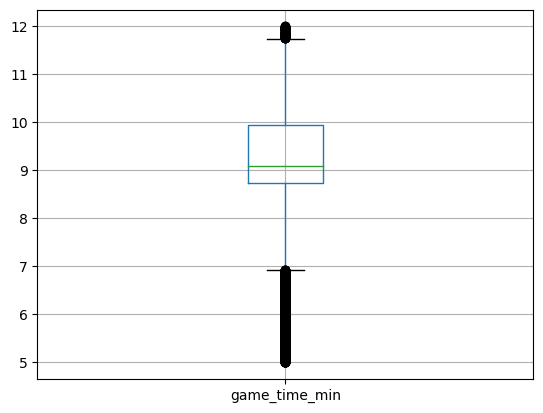

In [267]:
df_outlier_removed[df_outlier_removed.Game_category=='A_1.0'][['game_time_min']].boxplot()

In [268]:
temp = df_outlier_removed.groupby(['Uid'])['Wallet_Balance','Entry_Fee'].agg('mean')
temp['Wallet_Balance'].corr(temp['Entry_Fee'])

0.8060105642501438

In [269]:
temp = df_outlier_removed.groupby(['Uid'])['Wallet_Balance','Num_Players'].agg({'Wallet_Balance':'mean'
                                                                              ,'Num_Players':'median'})
temp['Wallet_Balance'].corr(temp['Num_Players'])

0.04493006743285017

In [270]:
temp = df_outlier_removed.groupby(['Uid'])['Wallet_Balance','game_time_min'].agg('mean')
temp['Wallet_Balance'].corr(temp['game_time_min'])

-0.021909969825996595

In [271]:
temp = df_outlier_removed.groupby(['Uid'])['Wallet_Balance','Game_category'].agg({'Wallet_Balance':'mean'
                                                                              ,'Game_category':lambda x: len(set(x))})
temp['Wallet_Balance'].corr(temp['Game_category'])

0.29350236071395763

In [272]:
df_outlier_removed['row_num'] = df_outlier_removed.groupby(['Uid']).cumcount()+1
df_outlier_removed.head()

,Uid,Eventtime_timestamp,Entry_Fee,Win_Loss,Winnings,Tournament_Type,Num_Players,game_time_min,Wallet_Balance,Game_category,row_num
2,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 13:03:40.048,1.0,W,2.0,A,2,10.467467,12.0,A_1.0,1
3,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 13:15:48.135,1.0,L,0.0,A,2,11.468917,13.0,A_1.0,2
4,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 16:33:31.527,1.0,W,2.0,A,2,9.892117,17.0,A_1.0,3
5,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 16:45:21.895,1.0,L,0.0,A,2,11.148250,18.0,A_1.0,4
6,0012CB6DA8CB360BA4ACC6A40F2C5E7D,2020-12-20 16:57:31.916,1.0,W,2.0,A,2,11.281933,17.0,A_1.0,5


In [273]:
import warnings
warnings.filterwarnings('ignore')

def feature_engg(df):
    df['cumulative_winning_sum'] = df[['Winnings']].shift().cumsum()
    for item in ["A","B","C","D"]:
        df[item+'_winning_cumsum'] = 0
        
        # df[item+'_wins_entry_fee_count'] = 0
        df[item+'_wins_entry_fee_sum'] = 0

        # df[item+'_loss_entry_fee_count'] = 0
        df[item+'_loss_entry_fee_sum'] = 0

        df[item+'_loss_previous_count'] = 0
        df[item+'_wins_previous_count'] = 0

        df[item+'_cumulative_count'] = 0
        
    df['recent_entry_fee'] = df['Entry_Fee'].shift()
    df['recent_tournament'] = df['Tournament_Type'].shift()
    df['recent_num_players'] = df['Num_Players'].shift()
    
        
    for item in df['Tournament_Type'].unique():
        df[item+'_winning_cumsum'] = df['Winnings'].cumsum().where(df['Tournament_Type'].eq(item)).ffill().fillna(0, downcast='infer')
        df[item+'_cumulative_count'] = df.groupby(['Tournament_Type']).cumcount().add(1).where(df['Tournament_Type'].eq(item)).ffill().fillna(0, downcast='infer')
        
        df[item+'_wins_previous_count'] = df.groupby(['Tournament_Type','Win_Loss']).cumcount().add(1).where(df['Tournament_Type'].eq(item)& df['Win_Loss'].eq('W')).ffill().fillna(0, downcast='infer')
        df[item+'_loss_previous_count'] = df.groupby(['Tournament_Type','Win_Loss']).cumcount().add(1).where(df['Tournament_Type'].eq(item)& df['Win_Loss'].eq('L')).ffill().fillna(0, downcast='infer')

        df[item+'_wins_entry_fee_sum'] = df['Entry_Fee'].cumsum().where(df['Tournament_Type'].eq(item)&df['Win_Loss'].eq('W')).ffill().fillna(0, downcast='infer')
        df[item+'_loss_entry_fee_sum'] = df['Entry_Fee'].cumsum().where(df['Tournament_Type'].eq(item)&df['Win_Loss'].eq('L')).ffill().fillna(0, downcast='infer')

        # df[item+'_wins_entry_fee_count']
        # df[item+'_loss_entry_fee_count']
    return df

# df = temp[['Uid','row_num','Num_Players','Tournament_Type','Win_Loss','Winnings','Entry_Fee']]
df = df_outlier_removed[['Uid','row_num','Entry_Fee','Win_Loss','Winnings','Tournament_Type','Num_Players','game_time_min','Wallet_Balance','Game_category']]

df1 = feature_engg(df[df['Uid']==df.Uid.unique()[-1]])
for uid in df.Uid.unique()[:-1]:
    df2 = feature_engg(df[df['Uid']==uid])
    df1 = pd.concat([df1,df2])

In [274]:
df_train = pd.merge(df_outlier_removed,df1,
                     left_on = ['Uid','row_num','Num_Players','Tournament_Type','Win_Loss','Winnings','Entry_Fee'],
                     right_on = ['Uid','row_num','Num_Players','Tournament_Type','Win_Loss','Winnings','Entry_Fee'])

In [275]:
print(df_train.shape,df1.shape,df_outlier_removed.shape)

(170246, 42) (170246, 38) (170246, 11)


In [ ]:
#(170246, 41) (170246, 38) (170246, 10)

In [276]:
df_train.to_csv('train_data_4.csv',index = False)
df_first_games = df_train[df_train['recent_entry_fee'].isna()]
df_first_games.to_csv("train_data_4_first_game_of_players.csv",index =False)
df_train[df_train['recent_entry_fee'].notna()].to_csv('train_data_4_except_first_game.csv',index = False)